In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
sample_submission=pd.read_csv("sample_submission.csv")

In [3]:
train

,id,datetime,total_articles_read
0,1,2019-07-01 00:00:00,1421
1,2,2019-07-01 01:00:00,1116
2,3,2019-07-01 02:00:00,921
3,4,2019-07-01 03:00:00,824
4,5,2019-07-01 04:00:00,737
...,...,...,...
4555,4556,2020-01-06 19:00:00,2783
4556,4557,2020-01-06 20:00:00,2754
4557,4558,2020-01-06 21:00:00,2831
4558,4559,2020-01-06 22:00:00,2562


In [3]:
train.isnull().sum()

id                     0
datetime               0
total_articles_read    0
dtype: int64

In [4]:
sample_submission

,id,total_articles_read
0,4561,2000
1,4562,2000
2,4563,2000
3,4564,2000
4,4565,2000
...,...,...
331,4892,2000
332,4893,2000
333,4894,2000
334,4895,2000


In [5]:
train.dtypes

id                      int64
datetime               object
total_articles_read     int64
dtype: object

In [6]:
def save_file(data,name):
    sample_submission["total_articles_read"]=data
    sample_submission.to_csv(name+".csv",index=False)

In [7]:
train["datetime"]=pd.to_datetime(train["datetime"])
test["datetime"]=pd.to_datetime(test["datetime"])

In [8]:
train.datetime.dt.month_name()

0          July
1          July
2          July
3          July
4          July
         ...   
4555    January
4556    January
4557    January
4558    January
4559    January
Name: datetime, Length: 4560, dtype: object

In [9]:
train.total_articles_read

0       1421
1       1116
2        921
3        824
4        737
        ... 
4555    2783
4556    2754
4557    2831
4558    2562
4559    2343
Name: total_articles_read, Length: 4560, dtype: int64

In [10]:
(31+31+30+31+30+31+6)*24

4560

<AxesSubplot:xlabel='datetime', ylabel='total_articles_read'>

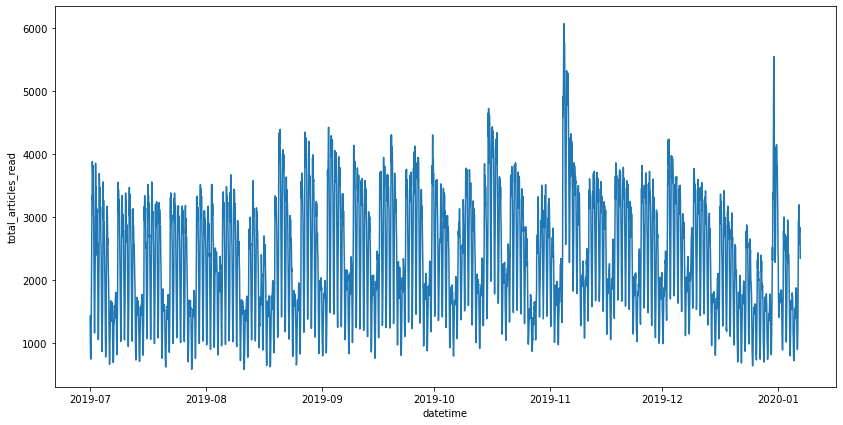

In [11]:
plt.figure(figsize=(14,7))
sns.lineplot(x=train["datetime"],y=train["total_articles_read"])

<AxesSubplot:xlabel='datetime', ylabel='total_articles_read'>

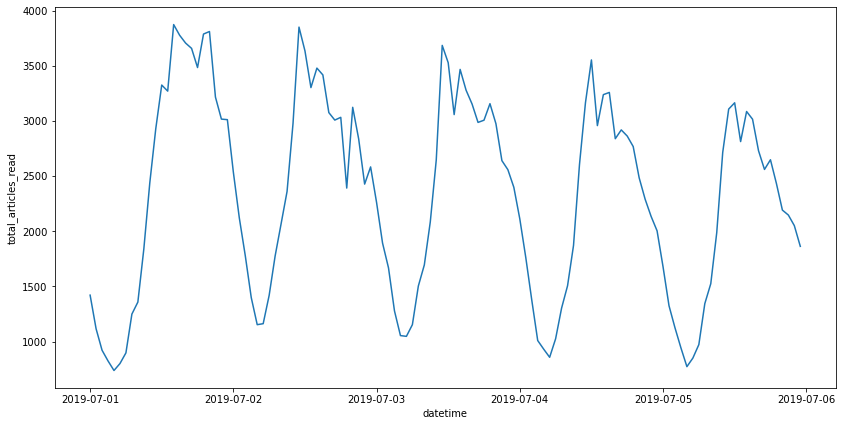

In [12]:
plt.figure(figsize=(14,7))
sns.lineplot(x=train["datetime"][:120],y=train["total_articles_read"][:120])

In [13]:
train.set_index('datetime')

,id,total_articles_read
datetime,,
2019-07-01 00:00:00,1,1421
2019-07-01 01:00:00,2,1116
2019-07-01 02:00:00,3,921
2019-07-01 03:00:00,4,824
2019-07-01 04:00:00,5,737
...,...,...
2020-01-06 19:00:00,4556,2783
2020-01-06 20:00:00,4557,2754
2020-01-06 21:00:00,4558,2831


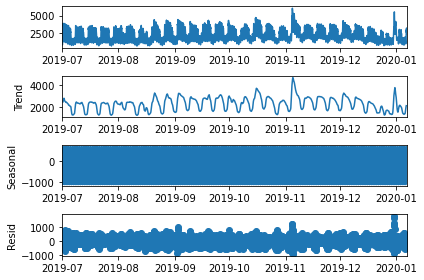

In [14]:
from statsmodels.tsa.api import seasonal_decompose

decomp=seasonal_decompose(train.set_index("datetime").drop(columns='id'))
decomp.plot()
plt.show()

In [15]:
monthly=pd.DataFrame(train.groupby(train.datetime.dt.month_name()).mean()["total_articles_read"]).reset_index()
monthly.rename(columns={'datetime':'Month'},inplace=True)
monthly

,Month,total_articles_read
0,August,2153.723118
1,December,2166.009409
2,January,1786.131944
3,July,2062.436828
4,November,2558.530556
5,October,2415.881720
6,September,2447.455556


In [16]:
train.datetime=="2019-12-24 23:00:00"

0       False
1       False
2       False
3       False
4       False
        ...  
4555    False
4556    False
4557    False
4558    False
4559    False
Name: datetime, Length: 4560, dtype: bool

In [17]:
train[train.datetime=="2019-12-24 23:00:00"]

,id,datetime,total_articles_read
4247,4248,2019-12-24 23:00:00,1526


In [18]:
train_data,valid_data=train.iloc[:4248,:],train.loc[4248:,:]

In [19]:
train_data

,id,datetime,total_articles_read
0,1,2019-07-01 00:00:00,1421
1,2,2019-07-01 01:00:00,1116
2,3,2019-07-01 02:00:00,921
3,4,2019-07-01 03:00:00,824
4,5,2019-07-01 04:00:00,737
...,...,...,...
4243,4244,2019-12-24 19:00:00,1960
4244,4245,2019-12-24 20:00:00,1901
4245,4246,2019-12-24 21:00:00,1836
4246,4247,2019-12-24 22:00:00,1754


In [20]:
train_data=train_data.set_index("datetime").drop(columns="id")
train_data

,total_articles_read
datetime,
2019-07-01 00:00:00,1421
2019-07-01 01:00:00,1116
2019-07-01 02:00:00,921
2019-07-01 03:00:00,824
2019-07-01 04:00:00,737
...,...
2019-12-24 19:00:00,1960
2019-12-24 20:00:00,1901
2019-12-24 21:00:00,1836


In [21]:
valid_data=valid_data.set_index("datetime").drop(columns="id")
valid_data

,total_articles_read
datetime,
2019-12-25 00:00:00,1280
2019-12-25 01:00:00,1065
2019-12-25 02:00:00,853
2019-12-25 03:00:00,782
2019-12-25 04:00:00,685
...,...
2020-01-06 19:00:00,2783
2020-01-06 20:00:00,2754
2020-01-06 21:00:00,2831


Text(0.5, 1.0, 'Train and Validation Data')

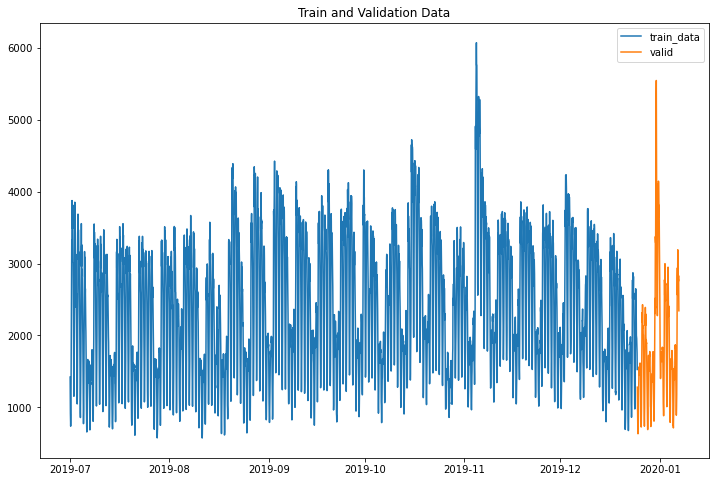

In [22]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(valid_data.index,valid_data['total_articles_read'], label='valid')
plt.legend(loc='best')
plt.title("Train and Validation Data")
# plt.show()

## Simple Exponential Smoothening

In [30]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [44]:
model = SimpleExpSmoothing(np.asarray(train_data['total_articles_read']))
fit2 = model.fit(smoothing_level=0.4,optimized=False) 

valid_pred = fit2.forecast(len(valid_data['datetime']))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [45]:
from sklearn.metrics import mean_squared_error as mse

In [46]:
np.sqrt(mse(val["total_articles_read"],valid_pred))

884.7348827014475

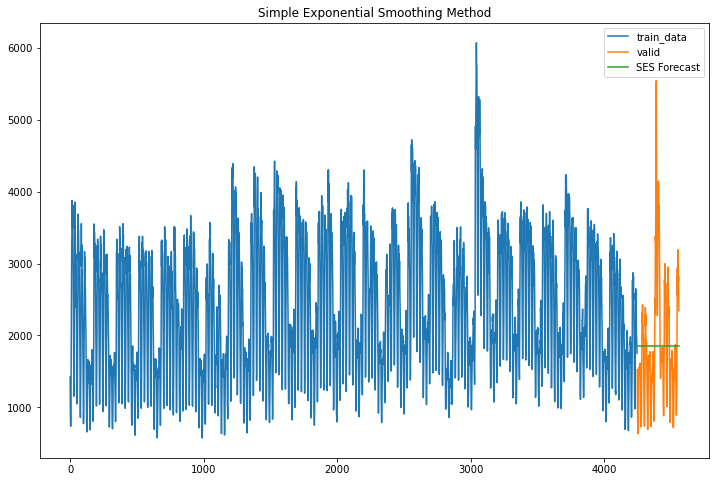

In [47]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(valid_data.index,valid_data['total_articles_read'], label='valid')
plt.plot(valid_data.index,valid_pred, label='SES Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method")
plt.show()

## Double Exponential Smoothening

In [25]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing

In [49]:
model = ExponentialSmoothing(np.asarray(train_data['total_articles_read']),trend=None,seasonal='mul',seasonal_periods=7*24)
fit2 = model.fit() 

valid_pred = fit2.forecast(len(valid_data['total_articles_read']))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [50]:
valid_pred

array([1422.25889998, 1242.56102857, 1093.93771911,  917.85279366,
        738.96313327,  702.2263122 ,  758.11005918,  917.84618283,
       1079.13198266, 1243.77812343, 1491.1781508 , 1659.04119422,
       1719.14791322, 1592.43337979, 1789.55746957, 1775.04890014,
       1633.97158398, 1582.47657295, 1658.88834725, 1744.07024749,
       1733.92950777, 1687.67170645, 1576.10441249, 1454.61562482,
       1340.08575231, 1157.33451648, 1002.59117582,  831.30234663,
        688.08342808,  635.630802  ,  716.75814471,  839.43939644,
        974.03455511, 1158.31010706, 1379.33104011, 1540.0346705 ,
       1606.13329227, 1514.79222707, 1688.9002986 , 1696.91856634,
       1535.83545112, 1472.20704575, 1578.63928936, 1665.81773768,
       1626.32234322, 1536.99308887, 1436.99711469, 1326.30434808,
       1219.32185883, 1055.23844689,  908.18101843,  763.74710101,
        639.53542701,  583.41967295,  651.46575697,  770.43774115,
        901.35895307, 1058.16515318, 1275.31311783, 1439.84687

In [51]:
from sklearn.metrics import mean_squared_error as mse

In [52]:
np.sqrt(mse(valid_data["total_articles_read"],valid_pred))

918.3069903082541

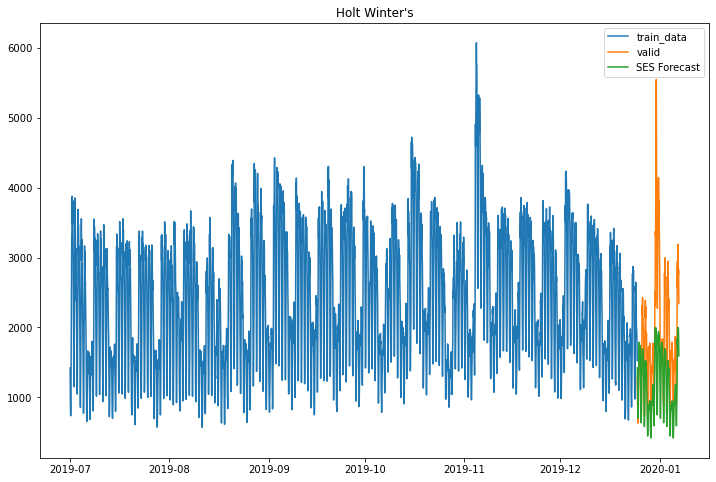

In [53]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(valid_data.index,valid_data['total_articles_read'], label='valid')
plt.plot(valid_data.index,valid_pred, label='SES Forecast')
plt.legend(loc='best')
plt.title("Holt Winter's")
plt.show()

In [54]:
test

,id,datetime
0,4561,2020-07-01 00:00:00
1,4562,2020-07-01 01:00:00
2,4563,2020-07-01 02:00:00
3,4564,2020-07-01 03:00:00
4,4565,2020-07-01 04:00:00
...,...,...
331,4892,2020-01-20 19:00:00
332,4893,2020-01-20 20:00:00
333,4894,2020-01-20 21:00:00
334,4895,2020-01-20 22:00:00


In [55]:
model1 = ExponentialSmoothing(np.asarray(train['total_articles_read']),seasonal='mul',seasonal_periods=7*24)
fit1 = model1.fit() 

test_pred = fit1.forecast(len(test['id']))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [56]:
test_pred

array([2139.67098315, 1829.18739752, 1699.0584811 , 1574.26851989,
       1370.95548348, 1305.42345271, 1301.58281376, 1508.36603937,
       1720.55643246, 2042.31766115, 2466.29505422, 2655.5757387 ,
       2739.65781827, 2426.02889741, 2645.59560082, 2711.69326444,
       2550.05855498, 2379.68673563, 2439.8305559 , 2619.52180132,
       2626.92983432, 2612.29130264, 2652.02039363, 2431.85917874,
       2126.1368644 , 1964.95993533, 1669.34085485, 1541.88113207,
       1342.65958835, 1242.13235873, 1265.65872082, 1364.64832364,
       1629.00971738, 1805.56543356, 2091.029089  , 2284.94954374,
       2494.04932619, 2342.66900911, 2404.39601973, 2402.08340608,
       2418.45375028, 2377.40136325, 2425.27260434, 2475.72279157,
       2459.11263109, 2481.48709663, 2471.4331093 , 2353.86447438,
       2125.57587575, 1727.40672177, 1576.65122092, 1418.94305589,
       1312.84855474, 1195.49481829, 1256.83893969, 1481.65193941,
       1645.8157637 , 1979.65891824, 2384.01574279, 2604.30967

In [58]:
save_file(test_pred,"Holt Winter's Model Weekly Seasonality")

## Stationarity Test

In [32]:
# dickey fuller, KPSS
from statsmodels.tsa.stattools import adfuller, kpss

In [33]:
def adf_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput=pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [34]:
adf_test(train_data['total_articles_read'])

Results of Dickey-Fuller Test:
Test Statistic                -8.413065e+00
p-value                        2.078592e-13
#Lags Used                     2.900000e+01
Number of Observations Used    4.218000e+03
Critical Value (1%)           -3.431901e+00
Critical Value (5%)           -2.862225e+00
Critical Value (10%)          -2.567135e+00
dtype: float64


In [35]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [36]:
kpss_test(train_data['total_articles_read'])

Results of KPSS Test:
Test Statistic            0.76993
p-value                   0.01000
Lags Used                31.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1874: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(warn_msg.format(direction="smaller"), InterpolationWarning)


## ACF and PACF

In [23]:
from statsmodels.tsa.api import acf,pacf

In [26]:
lag_acf = acf(train_data['total_articles_read'].dropna(), nlags=500) 
lag_pacf = pacf(train_data['total_articles_read'].dropna(), nlags=100)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


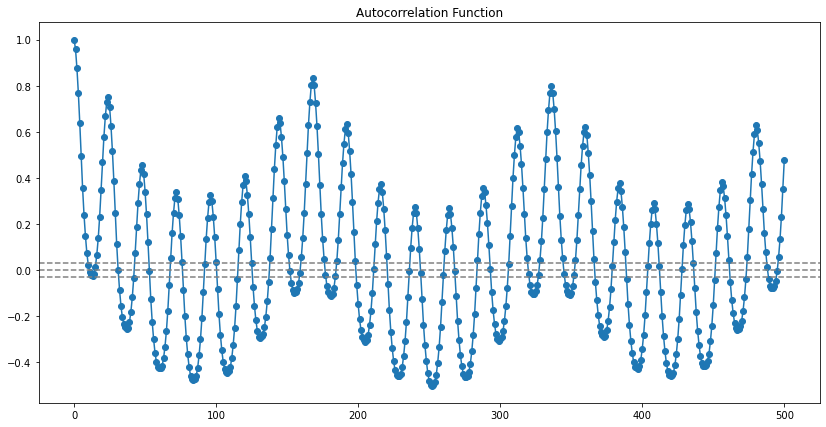

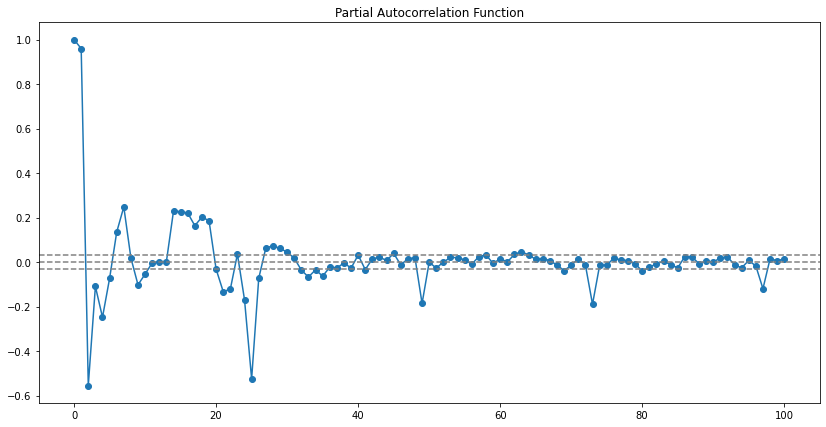

In [27]:
plt.figure(figsize=(14,7))
plt.plot(lag_acf,  marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data['total_articles_read'].dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data['total_articles_read'].dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(14,7))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data['total_articles_read'].dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data['total_articles_read'].dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

## Making Series Stationary

In [37]:
train_data['1_diff'] = train_data['total_articles_read'] - train_data['total_articles_read'].shift(1)

In [38]:
train_data

,total_articles_read,1_diff
datetime,,
2019-07-01 00:00:00,1421,NaN
2019-07-01 01:00:00,1116,-305.0
2019-07-01 02:00:00,921,-195.0
2019-07-01 03:00:00,824,-97.0
2019-07-01 04:00:00,737,-87.0
...,...,...
2019-12-24 19:00:00,1960,-16.0
2019-12-24 20:00:00,1901,-59.0
2019-12-24 21:00:00,1836,-65.0


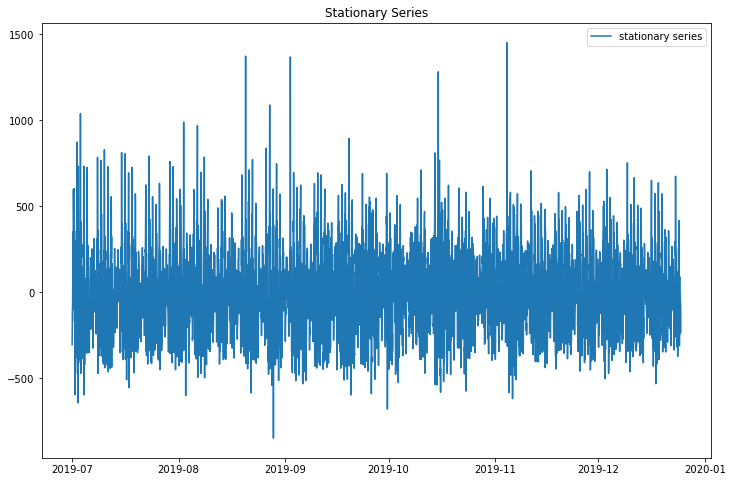

In [39]:
plt.figure(figsize=(12,8))

# plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(train_data.index,train_data['1_diff'], label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [40]:
adf_test(train_data['1_diff'].dropna())

Results of Dickey-Fuller Test:
Test Statistic                -1.091181e+01
p-value                        1.092171e-19
#Lags Used                     3.100000e+01
Number of Observations Used    4.215000e+03
Critical Value (1%)           -3.431902e+00
Critical Value (5%)           -2.862226e+00
Critical Value (10%)          -2.567135e+00
dtype: float64


In [41]:
kpss_test(train_data['1_diff'].dropna())

Results of KPSS Test:
Test Statistic            0.006385
p-value                   0.100000
Lags Used                31.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


In [42]:
lag_acf = acf(train_data['1_diff'].dropna(), nlags=100) 
lag_pacf = pacf(train_data['1_diff'].dropna(), nlags=50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


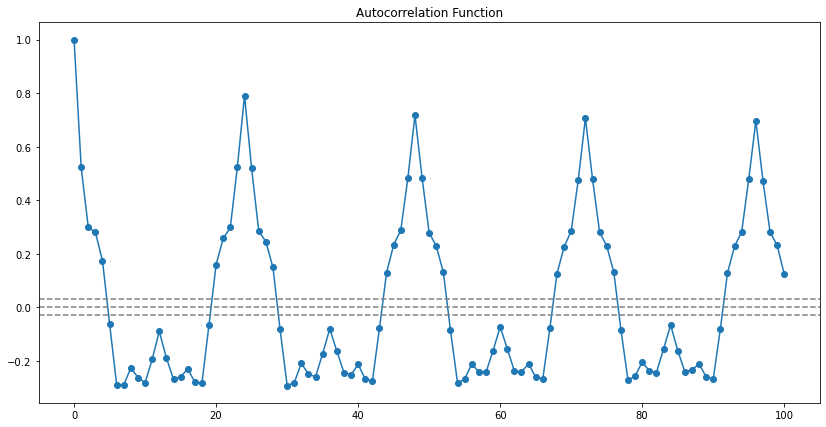

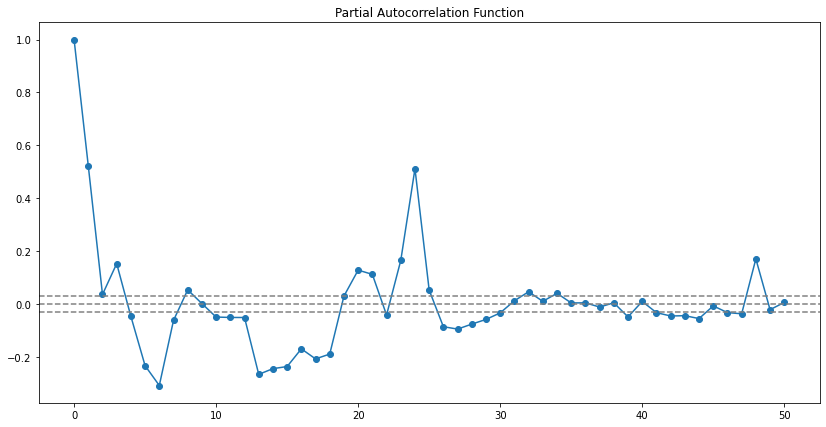

In [43]:
plt.figure(figsize=(14,7))
plt.plot(lag_acf,  marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data['1_diff'].dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data['1_diff'].dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(14,7))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data['1_diff'].dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data['1_diff'].dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

In [52]:
train_data['24_diff'] = train_data['total_articles_read'] - train_data['total_articles_read'].shift(24*7)

In [53]:
train_data

,total_articles_read,1_diff,24_diff
datetime,,,
2019-07-01 00:00:00,1421,NaN,NaN
2019-07-01 01:00:00,1116,-305.0,NaN
2019-07-01 02:00:00,921,-195.0,NaN
2019-07-01 03:00:00,824,-97.0,NaN
2019-07-01 04:00:00,737,-87.0,NaN
...,...,...,...
2019-12-24 19:00:00,1960,-16.0,-1030.0
2019-12-24 20:00:00,1901,-59.0,-956.0
2019-12-24 21:00:00,1836,-65.0,-852.0


In [56]:
lag_acf = acf(train_data['24_diff'].dropna(), nlags=1000) 
lag_pacf = pacf(train_data['24_diff'].dropna(), nlags=50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


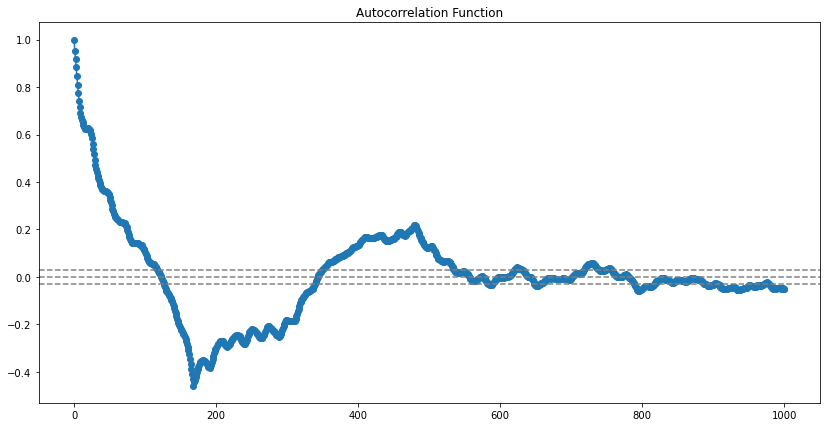

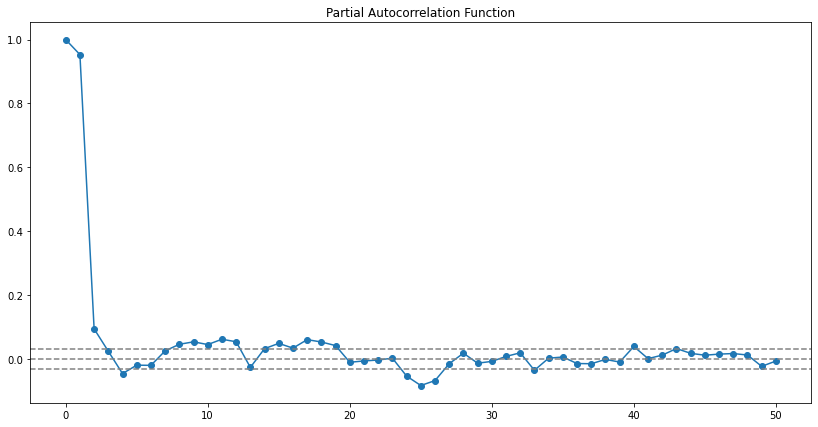

In [57]:
plt.figure(figsize=(14,7))
plt.plot(lag_acf,  marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data['24_diff'].dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data['24_diff'].dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(14,7))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_data['24_diff'].dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_data['24_diff'].dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

In [ ]:
valid_data

## SARIMA

In [58]:
from statsmodels.tsa.statespace import sarimax

model = sarimax.SARIMAX(train_data['total_articles_read'], seasonal_order=(0,1,2,7*24), order=(0,1,0))
fit1 = model.fit()

valid_data['SARIMA'] = fit1.predict(start="2019-12-24 23:00:00", end="2020-01-06 23:00:00", dynamic=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


KeyboardInterrupt: 

In [218]:
valid_data

,total_articles_read,SARIMA
datetime,,
2019-12-24 23:00:00,1526,1521.859952
2019-12-25 00:00:00,1280,1334.376908
2019-12-25 01:00:00,1065,1075.181682
2019-12-25 02:00:00,853,899.221504
2019-12-25 03:00:00,782,768.747795
...,...,...
2020-01-06 19:00:00,2783,2737.622531
2020-01-06 20:00:00,2754,2717.183489
2020-01-06 21:00:00,2831,2643.778938


In [219]:
np.sqrt(mse(valid_data["total_articles_read"],valid_data["SARIMA"]))

741.1291524806492

In [220]:
valid_data

,total_articles_read,SARIMA
datetime,,
2019-12-24 23:00:00,1526,1521.859952
2019-12-25 00:00:00,1280,1334.376908
2019-12-25 01:00:00,1065,1075.181682
2019-12-25 02:00:00,853,899.221504
2019-12-25 03:00:00,782,768.747795
...,...,...
2020-01-06 19:00:00,2783,2737.622531
2020-01-06 20:00:00,2754,2717.183489
2020-01-06 21:00:00,2831,2643.778938


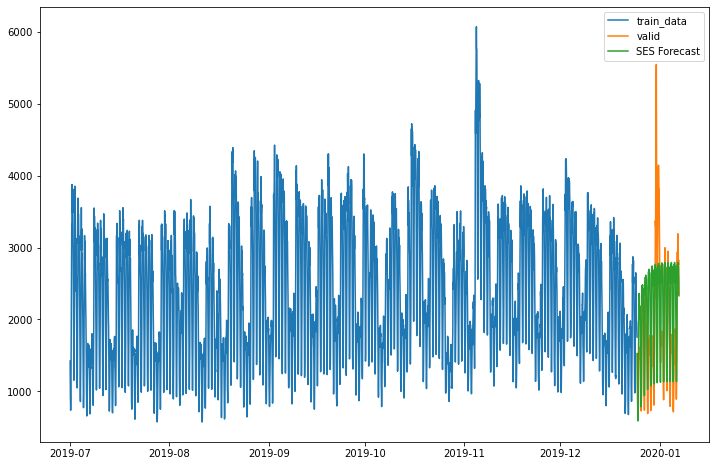

In [221]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(valid_data.index,valid_data['total_articles_read'], label='valid')
plt.plot(valid_data.index,valid_data['SARIMA'], label='SES Forecast')
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='datetime', ylabel='total_articles_read'>

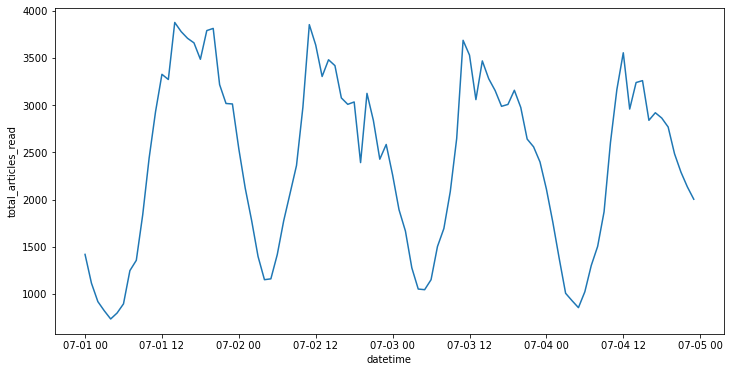

In [81]:
plt.figure(figsize=(12,6))
sns.lineplot(x=train[:96].datetime,y=train[:96].total_articles_read)

In [89]:
test['total_articles_read']=np.full(test.shape[0],0)

In [126]:
daily_train=train.set_index("datetime").drop(columns='id').resample('d').sum()
daily_test=test.set_index("datetime").drop(columns='id').resample('d').sum()

In [127]:
daily_train

,total_articles_read
datetime,
2019-07-01,58506
2019-07-02,60952
2019-07-03,58211
2019-07-04,52864
2019-07-05,49072
...,...
2020-01-02,48840
2020-01-03,48537
2020-01-04,34669


In [101]:
test

,id,datetime,total_articles_read
0,4561,2020-07-01 00:00:00,0
1,4562,2020-07-01 01:00:00,0
2,4563,2020-07-01 02:00:00,0
3,4564,2020-07-01 03:00:00,0
4,4565,2020-07-01 04:00:00,0
...,...,...,...
331,4892,2020-01-20 19:00:00,0
332,4893,2020-01-20 20:00:00,0
333,4894,2020-01-20 21:00:00,0
334,4895,2020-01-20 22:00:00,0


In [103]:
daily_test=daily_test.dropna()
daily_test

,total_articles_read
datetime,
2020-01-13,0
2020-01-14,0
2020-01-15,0
2020-01-16,0
2020-01-17,0
...,...
2020-11-27,0
2020-11-28,0
2020-11-29,0


<AxesSubplot:xlabel='datetime'>

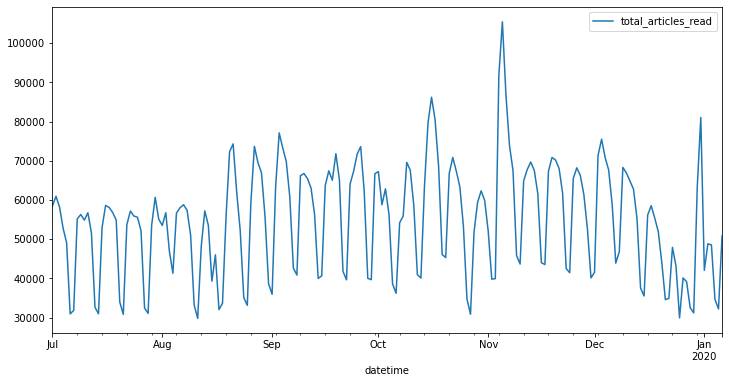

In [105]:
daily_train.plot(kind='line',figsize=(12,6))

## Making Series Stationary

In [113]:
# daily_train_1 = train_data['total_articles_read'] - train_data['total_articles_read'].shift(1)

In [106]:
# train_data

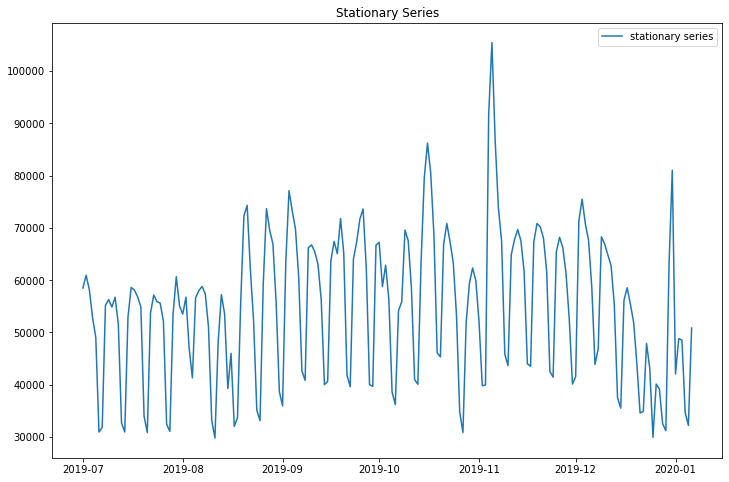

In [107]:
plt.figure(figsize=(12,8))

# plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(daily_train.index,daily_train, label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

In [116]:
adf_test(daily_train.dropna())

Results of Dickey-Fuller Test:
Test Statistic                  -1.803436
p-value                          0.378757
#Lags Used                      14.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64


In [117]:
kpss_test(daily_train.dropna())

Results of KPSS Test:
Test Statistic            0.258547
p-value                   0.100000
Lags Used                15.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1843: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1876: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(warn_msg.format(direction="greater"), InterpolationWarning)


In [111]:
lag_acf = acf(daily_train.dropna(), nlags=100) 
lag_pacf = pacf(daily_train.dropna(), nlags=50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  -----


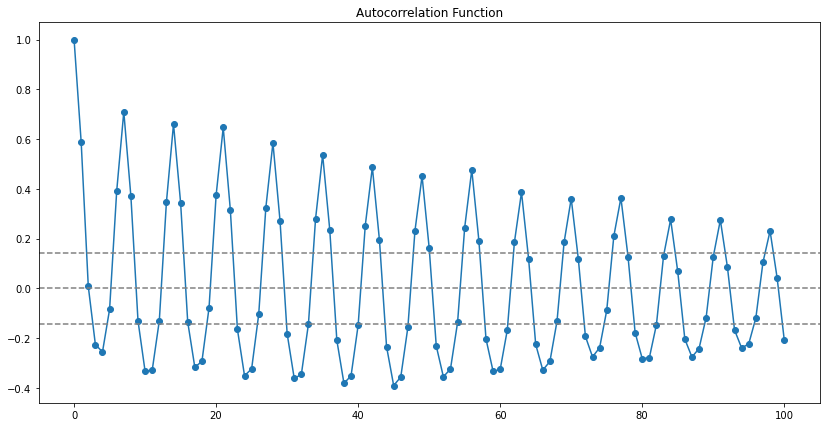

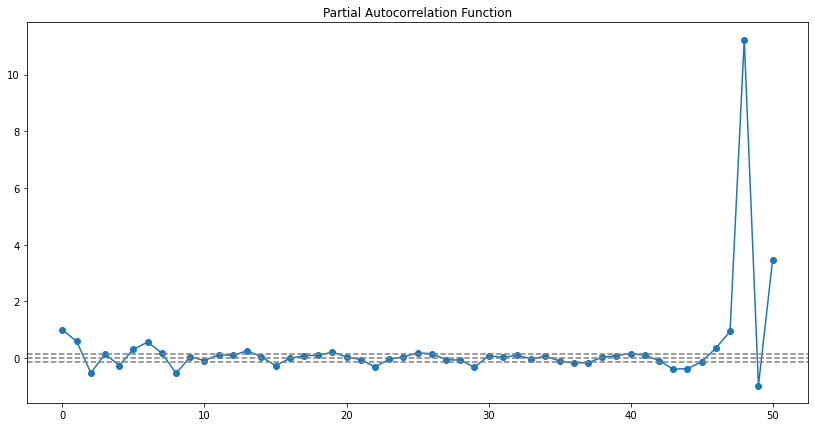

In [112]:
plt.figure(figsize=(14,7))
plt.plot(lag_acf,  marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(daily_train.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(daily_train.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(14,7))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(daily_train.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(daily_train.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

In [122]:
daily_train_7 = train_data['total_articles_read'] - train_data['total_articles_read'].shift(7)

In [123]:
lag_acf = acf(daily_train_7.dropna(), nlags=100) 
lag_pacf = pacf(daily_train_7.dropna(), nlags=50)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:666: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


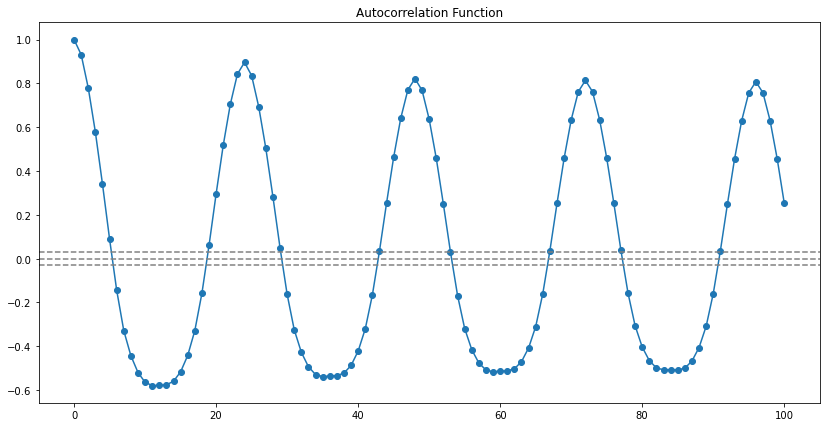

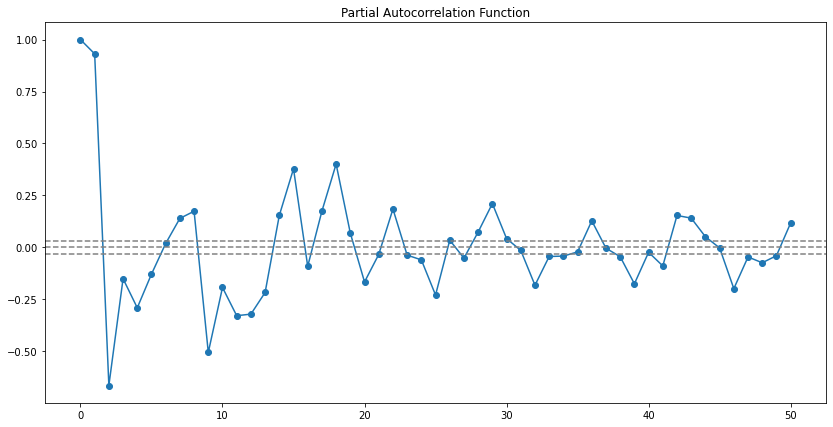

In [124]:
plt.figure(figsize=(14,7))
plt.plot(lag_acf,  marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(daily_train_7.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(daily_train_7.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 

plt.figure(figsize=(14,7))
plt.plot(lag_pacf, marker='o') 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(daily_train_7.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(daily_train_7.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

In [132]:
from statsmodels.tsa.statespace import sarimax

model = sarimax.SARIMAX(daily_train, seasonal_order=(3,1,0,7), order=(2,1,0))
fit1 = model.fit()

test_pred = fit1.predict(start="2020-01-07", end="2020-01-20", dynamic=True)

In [143]:
test_pred

2020-01-07    57491.800900
2020-01-08    38254.816560
2020-01-09    42699.862815
2020-01-10    39471.169716
2020-01-11    27705.527241
2020-01-12    26195.173639
2020-01-13    47441.646831
2020-01-14    54115.829558
2020-01-15    33338.750652
2020-01-16    38324.718020
2020-01-17    35584.814875
2020-01-18    24600.061129
2020-01-19    23153.513176
2020-01-20    44596.242516
Freq: D, Name: predicted_mean, dtype: float64

In [144]:
for i in test_pred:
    print(i)

57491.80089989783
38254.816560003455
42699.862814844106
39471.169715620665
27705.52724052449
26195.17363939086
47441.64683101858
54115.8295579519
33338.75065195521
38324.71801960598
35584.81487458064
24600.061129217254
23153.513176434244
44596.24251572086


In [148]:
test.datetime[0].hour

0

In [178]:
predsss=[]

for i in test_pred:
    for j in range(24):
        predsss.append((i*weights[weights.datetime==j]['total_articles_read']/weights.total_articles_read.sum()))

In [179]:
predsss

[0    2342.901552
 Name: total_articles_read, dtype: float64,
 1    1991.761311
 Name: total_articles_read, dtype: float64,
 2    1713.73938
 Name: total_articles_read, dtype: float64,
 3    1440.291487
 Name: total_articles_read, dtype: float64,
 4    1244.071907
 Name: total_articles_read, dtype: float64,
 5    1202.010649
 Name: total_articles_read, dtype: float64,
 6    1352.335176
 Name: total_articles_read, dtype: float64,
 7    1599.670177
 Name: total_articles_read, dtype: float64,
 8    1821.196116
 Name: total_articles_read, dtype: float64,
 9    2134.827039
 Name: total_articles_read, dtype: float64,
 10    2580.955897
 Name: total_articles_read, dtype: float64,
 11    2991.459189
 Name: total_articles_read, dtype: float64,
 12    3090.381036
 Name: total_articles_read, dtype: float64,
 13    2808.221479
 Name: total_articles_read, dtype: float64,
 14    3044.436266
 Name: total_articles_read, dtype: float64,
 15    3054.904624
 Name: total_articles_read, dtype: float64,
 16

In [180]:
preds=[]
for i in predsss:
    preds.append(i.values[0])

In [181]:
preds

[2342.90155158576,
 1991.7613111208934,
 1713.7393801203934,
 1440.2914866113179,
 1244.0719072690479,
 1202.0106494674699,
 1352.3351762991663,
 1599.6701770280922,
 1821.1961159696568,
 2134.8270393248945,
 2580.955896534984,
 2991.4591887907295,
 3090.3810358425885,
 2808.221479140305,
 3044.4362655331947,
 3054.9046242847044,
 2872.6281254114624,
 2829.627753632177,
 2942.4484875541134,
 3088.7182516820585,
 3029.001651099572,
 2897.161097029115,
 2798.6646133671593,
 2620.3876351989798,
 1558.9574108161219,
 1325.3100858835187,
 1140.3153944039382,
 958.3642493507026,
 827.8005185973504,
 799.8131242855255,
 899.8384689155993,
 1064.4141985614278,
 1211.8166807387975,
 1420.5054546630884,
 1717.3578288722651,
 1990.505093294607,
 2056.3272984353803,
 1868.5794472053985,
 2025.7558302857285,
 2032.721434727666,
 1911.4353744816747,
 1882.8230974494647,
 1957.8935668519343,
 2055.2208884422284,
 2015.4856989871685,
 1927.7595166065516,
 1862.2203465803057,
 1743.5955515670123,
 1740

In [182]:
len(preds)

336

In [183]:
save_file(preds,'SARIMAX downsampled')

In [151]:
predsss

[   datetime  total_articles_read
 0       0.0             0.040752,
    datetime  total_articles_read
 1  0.000018             0.034644,
    datetime  total_articles_read
 2  0.000037             0.029808,
    datetime  total_articles_read
 3  0.000055             0.025052,
    datetime  total_articles_read
 4  0.000073             0.021639,
    datetime  total_articles_read
 5  0.000091             0.020908,
    datetime  total_articles_read
 6   0.00011             0.023522,
    datetime  total_articles_read
 7  0.000128             0.027824,
    datetime  total_articles_read
 8  0.000146             0.031677,
    datetime  total_articles_read
 9  0.000164             0.037133,
     datetime  total_articles_read
 10  0.000183             0.044893,
     datetime  total_articles_read
 11  0.000201             0.052033,
     datetime  total_articles_read
 12  0.000219             0.053753,
     datetime  total_articles_read
 13  0.000237             0.048846,
     datetime  total_artic

In [141]:
weights=train.groupby(train.datetime.dt.hour).mean().drop(columns='id').reset_index()
weights

,datetime,total_articles_read
0,0,2232.189474
1,1,1897.642105
2,2,1632.757895
3,3,1372.231579
4,4,1185.284211
5,5,1145.210526
6,6,1288.431579
7,7,1524.078947
8,8,1735.136842
9,9,2033.947368


In [134]:
test_pred

2020-01-07    57491.800900
2020-01-08    38254.816560
2020-01-09    42699.862815
2020-01-10    39471.169716
2020-01-11    27705.527241
2020-01-12    26195.173639
2020-01-13    47441.646831
2020-01-14    54115.829558
2020-01-15    33338.750652
2020-01-16    38324.718020
2020-01-17    35584.814875
2020-01-18    24600.061129
2020-01-19    23153.513176
2020-01-20    44596.242516
Freq: D, Name: predicted_mean, dtype: float64

In [125]:
daily_test

,total_articles_read
datetime,
2020-01-13,0
2020-01-14,0
2020-01-15,0
2020-01-16,0
2020-01-17,0
...,...
2020-11-27,0
2020-11-28,0
2020-11-29,0


In [218]:
valid_data

,total_articles_read,SARIMA
datetime,,
2019-12-24 23:00:00,1526,1521.859952
2019-12-25 00:00:00,1280,1334.376908
2019-12-25 01:00:00,1065,1075.181682
2019-12-25 02:00:00,853,899.221504
2019-12-25 03:00:00,782,768.747795
...,...,...
2020-01-06 19:00:00,2783,2737.622531
2020-01-06 20:00:00,2754,2717.183489
2020-01-06 21:00:00,2831,2643.778938


In [219]:
np.sqrt(mse(valid_data["total_articles_read"],valid_data["SARIMA"]))

741.1291524806492

In [220]:
valid_data

,total_articles_read,SARIMA
datetime,,
2019-12-24 23:00:00,1526,1521.859952
2019-12-25 00:00:00,1280,1334.376908
2019-12-25 01:00:00,1065,1075.181682
2019-12-25 02:00:00,853,899.221504
2019-12-25 03:00:00,782,768.747795
...,...,...
2020-01-06 19:00:00,2783,2737.622531
2020-01-06 20:00:00,2754,2717.183489
2020-01-06 21:00:00,2831,2643.778938


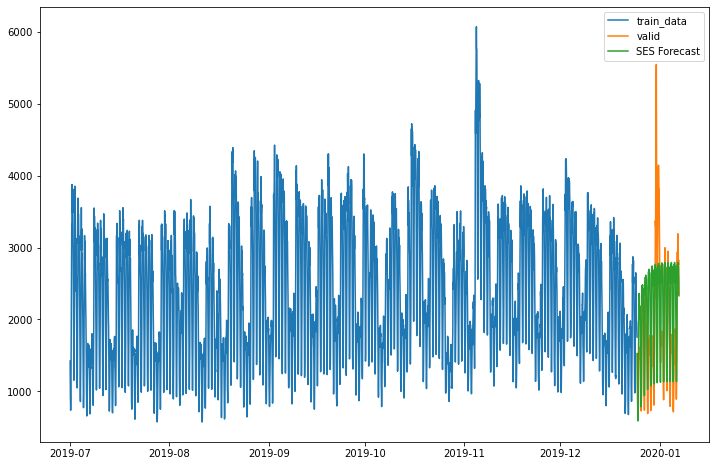

In [221]:
plt.figure(figsize=(12,8))

plt.plot(train_data.index, train_data['total_articles_read'], label='train_data')
plt.plot(valid_data.index,valid_data['total_articles_read'], label='valid')
plt.plot(valid_data.index,valid_data['SARIMA'], label='SES Forecast')
plt.legend(loc='best')
plt.show()

## TBATS

In [59]:
from tbats import TBATS, BATS

In [60]:
model=TBATS(seasonal_periods=(24, 7*24))

In [68]:
train=train.set_index("datetime").drop(columns="id")
train

test=test.set_index("datetime").drop(columns="id")
test

""
datetime
07-01-2020 0:00
07-01-2020 1:00
07-01-2020 2:00
07-01-2020 3:00
07-01-2020 4:00
...
20-01-2020 19:00
20-01-2020 20:00
20-01-2020 21:00


In [72]:
mm=model.fit(train)

In [73]:
mm

In [76]:
forecasts=mm.forecast(336)

In [79]:
forecasts

array([2086.85989376, 1779.97638836, 1521.55623808, 1291.21155505,
       1114.57150968, 1098.83734027, 1243.67699622, 1504.79378621,
       1727.2785652 , 2059.84706141, 2489.42121585, 2911.46294159,
       3010.35529355, 2769.6822382 , 2975.47225617, 3005.15536533,
       2823.49135607, 2795.40876357, 2881.77710343, 3025.47579872,
       2938.5245829 , 2808.41713305, 2683.84251018, 2511.66384753,
       2222.5656406 , 1881.6944099 , 1593.14285782, 1336.14430936,
       1136.80358939, 1101.91881058, 1227.57983387, 1467.07280154,
       1667.16581478, 1974.92061571, 2377.59248318, 2773.72733848,
       2856.58836179, 2612.26918524, 2805.05000373, 2829.50119409,
       2651.49681387, 2624.56923027, 2710.2614788 , 2852.99718578,
       2772.67144235, 2650.80274457, 2534.36574891, 2371.48980032,
       2094.74452556, 1767.63357389, 1491.30288616, 1245.65344219,
       1055.90124539, 1024.84860843, 1149.14215226, 1384.8831124 ,
       1583.9016801 , 1889.66733297, 2290.65778733, 2687.66306

In [82]:
len(forecasts)

336

In [83]:
save_file(forecasts,"TBATS")

In [85]:
test

""
datetime
07-01-2020 0:00
07-01-2020 1:00
07-01-2020 2:00
07-01-2020 3:00
07-01-2020 4:00
...
20-01-2020 19:00
20-01-2020 20:00
20-01-2020 21:00


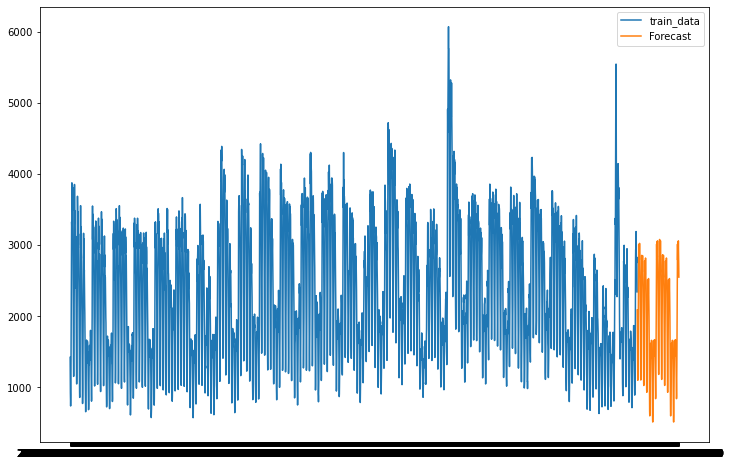

In [89]:
plt.figure(figsize=(12,8))

plt.plot(train.index, train, label='train_data')
plt.plot(test.index, forecasts, label='Forecast')
plt.legend(loc='best')
plt.show()

In [87]:
test.index

Index(['07-01-2020 0:00', '07-01-2020 1:00', '07-01-2020 2:00',
       '07-01-2020 3:00', '07-01-2020 4:00', '07-01-2020 5:00',
       '07-01-2020 6:00', '07-01-2020 7:00', '07-01-2020 8:00',
       '07-01-2020 9:00',
       ...
       '20-01-2020 14:00', '20-01-2020 15:00', '20-01-2020 16:00',
       '20-01-2020 17:00', '20-01-2020 18:00', '20-01-2020 19:00',
       '20-01-2020 20:00', '20-01-2020 21:00', '20-01-2020 22:00',
       '20-01-2020 23:00'],
      dtype='object', name='datetime', length=336)

## TBATS modified

In [91]:
from tbats import TBATS, BATS

In [107]:
model=TBATS(use_arma_errors=True,seasonal_periods=(24, 7*24),n_jobs=10)

In [106]:
train=train.set_index("datetime").drop(columns="id")
train

test=test.set_index("datetime").drop(columns="id")
test

KeyError: "None of ['datetime'] are in the columns"

In [108]:
mm=model.fit(train)

In [109]:
mm

In [110]:
forecasts=mm.forecast(336)

In [111]:
forecasts

array([2086.85989376, 1779.97638836, 1521.55623808, 1291.21155505,
       1114.57150968, 1098.83734027, 1243.67699622, 1504.79378621,
       1727.2785652 , 2059.84706141, 2489.42121585, 2911.46294159,
       3010.35529355, 2769.6822382 , 2975.47225617, 3005.15536533,
       2823.49135607, 2795.40876357, 2881.77710343, 3025.47579872,
       2938.5245829 , 2808.41713305, 2683.84251018, 2511.66384753,
       2222.5656406 , 1881.6944099 , 1593.14285782, 1336.14430936,
       1136.80358939, 1101.91881058, 1227.57983387, 1467.07280154,
       1667.16581478, 1974.92061571, 2377.59248318, 2773.72733848,
       2856.58836179, 2612.26918524, 2805.05000373, 2829.50119409,
       2651.49681387, 2624.56923027, 2710.2614788 , 2852.99718578,
       2772.67144235, 2650.80274457, 2534.36574891, 2371.48980032,
       2094.74452556, 1767.63357389, 1491.30288616, 1245.65344219,
       1055.90124539, 1024.84860843, 1149.14215226, 1384.8831124 ,
       1583.9016801 , 1889.66733297, 2290.65778733, 2687.66306

In [112]:
len(forecasts)

336

In [113]:
save_file(forecasts,"TBATS modified (1)")

In [85]:
test

""
datetime
07-01-2020 0:00
07-01-2020 1:00
07-01-2020 2:00
07-01-2020 3:00
07-01-2020 4:00
...
20-01-2020 19:00
20-01-2020 20:00
20-01-2020 21:00


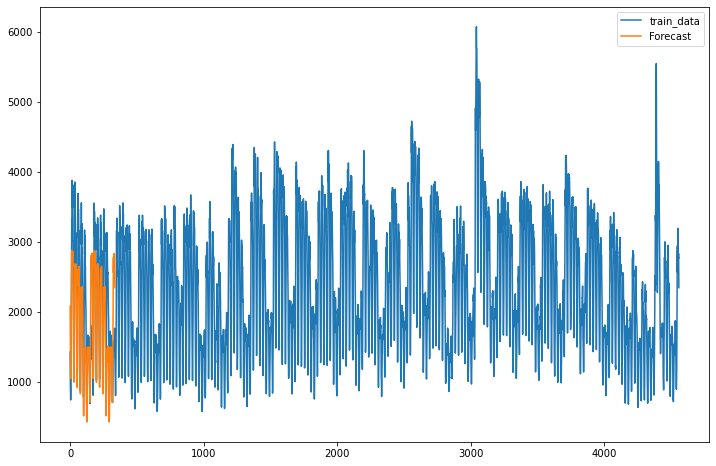

In [103]:
plt.figure(figsize=(12,8))

plt.plot(train.reset_index().index, train, label='train_data')
plt.plot(test.reset_index().index, forecasts, label='Forecast')
plt.legend(loc='best')
plt.show()

In [87]:
test.index

Index(['07-01-2020 0:00', '07-01-2020 1:00', '07-01-2020 2:00',
       '07-01-2020 3:00', '07-01-2020 4:00', '07-01-2020 5:00',
       '07-01-2020 6:00', '07-01-2020 7:00', '07-01-2020 8:00',
       '07-01-2020 9:00',
       ...
       '20-01-2020 14:00', '20-01-2020 15:00', '20-01-2020 16:00',
       '20-01-2020 17:00', '20-01-2020 18:00', '20-01-2020 19:00',
       '20-01-2020 20:00', '20-01-2020 21:00', '20-01-2020 22:00',
       '20-01-2020 23:00'],
      dtype='object', name='datetime', length=336)